In [1]:
import pandas as pd

#### Import des données

In [2]:
# data = pd.read_csv(r'/home/utilisateur/Téléchargements/EDA(2).csv')
data = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOX\BOX\eda\EDA.csv')
pd.set_option('display.max_columns', None)
data.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,actor_celebs_by_year,vacances_automne,vacances_noel,vacances_hiver,vacances_printemps,vacances_ete,nb_zone_en_vacances,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,jpbox_copies,imdb_entries,imdb_us_entries,imdb_id,cumulative_entries,distributors,entries
5102,401334,Les 3 Vies Du Chevalier,2014,Titre Original : Les 3 Vies Du Chevalier,NaN,110,On the continuing struggle of freethought in F...,NaN,NaN,AZOTH Studio|Centreville Télévision,347 340 €,France,Dominique Dattola,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,tt3685860,NaN,NaN,NaN


#### Suppression de certaines features

In [3]:
data = data.drop(columns=['budget', 'societies', 'nb_zone_en_vacances', 'vacances_noel', 'imdb_entries', 'imdb_us_entries', 'imdb_id', 'original_title', 'poster_link', 'all_director_oscars', 'all_actor_oscars', 'actor_celebs', 'actor_celebs_by_year'])
data.dtypes 

id_allocine                int64
title                     object
release_year               int64
genres                    object
duration_m                 int64
synopsis                  object
release_date              object
nationality               object
directors                 object
vacances_automne           int64
vacances_hiver             int64
vacances_printemps         int64
vacances_ete               int64
entries_mean_actor       float64
entries_sum_actor        float64
entries_mean_director    float64
entries_sum_director     float64
jpbox_copies             float64
cumulative_entries       float64
distributors              object
entries                  float64
dtype: object

Conversion de la release_date en trois nouvelles variables (year, month, day)

In [4]:
data['release_date'] = pd.to_datetime(data['release_date'])
# # Création de nouvelles colonnes "year", "month" et "day" en extrayant l'année, le mois et le jour
# data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month
data['day'] = data['release_date'].dt.day
data.dtypes

id_allocine                       int64
title                            object
release_year                      int64
genres                           object
duration_m                        int64
synopsis                         object
release_date             datetime64[ns]
nationality                      object
directors                        object
vacances_automne                  int64
vacances_hiver                    int64
vacances_printemps                int64
vacances_ete                      int64
entries_mean_actor              float64
entries_sum_actor               float64
entries_mean_director           float64
entries_sum_director            float64
jpbox_copies                    float64
cumulative_entries              float64
distributors                     object
entries                         float64
month                           float64
day                             float64
dtype: object

In [5]:
data = data.drop(columns=["release_date"])
data.shape

(13499, 22)

In [6]:
def change_country(nationality):
    nationality = nationality.split('|')
    country = nationality[0]
    if country != "U.S.A." and country != "France":
        country = "Pays étrangers"
    return country
data['country'] = data['nationality'].apply(lambda x: change_country(x))
data = data.drop(columns=["nationality"])

In [7]:
data.country.value_counts()

country
France            6316
Pays étrangers    5402
U.S.A.            1781
Name: count, dtype: int64

In [8]:
# def change_country_to_nb(country):
#     if "France" in country:
#         number = 1
#     elif "U.S.A." in country:
#         number = 2
#     else:
#         number = 0
#     return number
# data['country_nb'] = data['country'].apply(lambda x: change_country_to_nb(x))
# data['country_nb'] = data['country_nb'].astype(int)

In [9]:
# data.country_nb.value_counts()

In [10]:
# data['country_x_jpbox'] = data['country_nb'] * data['jpbox_copies']
# data.country_x_jpbox.value_counts()

In [11]:
data['duration_x_jpbox'] = data['duration_m'] * data['jpbox_copies']
data.duration_x_jpbox.value_counts()

duration_x_jpbox
33120.0    6
0.0        5
31500.0    5
41040.0    4
20520.0    4
          ..
14385.0    1
38760.0    1
29290.0    1
16380.0    1
23816.0    1
Name: count, Length: 2815, dtype: int64

In [12]:
# # TRAITEMENT DE LA FEATURE BUDGET 
# def convert_budget(value):
#     if 'M' in value:
#         return int(''.join(filter(str.isdigit, value))) * 1000000
#     else:
#         return int(''.join(filter(str.isdigit, value)))

# # Appliquer la fonction à la colonne 'budget'
# data['budget'] = data['budget'].apply(lambda x: convert_budget(x))
# data['budget'] = data['budget'].astype(int)
# # data.isna().sum()

In [13]:
# data.budget.value_counts() 

In [14]:
# data['budget'] = data['budget'].fillna(0)

In [15]:
# TRAITEMENT DE LA FEATURE LEN(TITLE) 
def whats_the_length(title):
    if title is not None:
        return len(title)
    else:
        return 0

# Appliquer la fonction à la colonne 'budget'
data['len_title'] = data['title'].apply(lambda x: whats_the_length(x))
data['len_title'] = data['len_title'].astype(int)
data = data.drop(columns=['title'])
data.isna().sum()

id_allocine                  0
release_year                 0
genres                    9731
duration_m                   0
synopsis                     0
directors                    0
vacances_automne             0
vacances_hiver               0
vacances_printemps           0
vacances_ete                 0
entries_mean_actor        8326
entries_sum_actor         8064
entries_mean_director    11175
entries_sum_director      8064
jpbox_copies             10323
cumulative_entries        9902
distributors              9731
entries                   9731
month                     9731
day                       9731
country                      0
duration_x_jpbox         10323
len_title                    0
dtype: int64

#### Séparation des features catégorielles et quantitatives

In [16]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols 

Index(['genres', 'synopsis', 'directors', 'distributors', 'country'], dtype='object')

### ML

Combien de valeurs NaN dans le dataframe?

In [17]:
print(data.isna().sum(axis=0))

id_allocine                  0
release_year                 0
genres                    9731
duration_m                   0
synopsis                     0
directors                    0
vacances_automne             0
vacances_hiver               0
vacances_printemps           0
vacances_ete                 0
entries_mean_actor        8326
entries_sum_actor         8064
entries_mean_director    11175
entries_sum_director      8064
jpbox_copies             10323
cumulative_entries        9902
distributors              9731
entries                   9731
month                     9731
day                       9731
country                      0
duration_x_jpbox         10323
len_title                    0
dtype: int64


In [18]:
data[["entries_mean_actor", "entries_mean_director", "entries_sum_actor", "entries_sum_director"]] = data[["entries_mean_actor", "entries_mean_director", "entries_sum_actor", "entries_sum_director"]].fillna(0)
data = data.dropna()
data.shape

(3040, 23)

In [19]:
print(data.isna().sum(axis=0))

id_allocine              0
release_year             0
genres                   0
duration_m               0
synopsis                 0
directors                0
vacances_automne         0
vacances_hiver           0
vacances_printemps       0
vacances_ete             0
entries_mean_actor       0
entries_sum_actor        0
entries_mean_director    0
entries_sum_director     0
jpbox_copies             0
cumulative_entries       0
distributors             0
entries                  0
month                    0
day                      0
country                  0
duration_x_jpbox         0
len_title                0
dtype: int64


#### Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=["entries"])
y=data["entries"]

In [21]:
y = y.dropna()
y.isna().sum()

0

#### Séparation & Imputation des features

In [22]:
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols = cat_cols.fillna('Missing')
cat_cols

Index(['genres', 'synopsis', 'directors', 'distributors', 'country'], dtype='object')

In [23]:
num_cols = data.select_dtypes(exclude=['object']).columns
num_cols = num_cols[:-1]
num_cols 

Index(['id_allocine', 'release_year', 'duration_m', 'vacances_automne',
       'vacances_hiver', 'vacances_printemps', 'vacances_ete',
       'entries_mean_actor', 'entries_sum_actor', 'entries_mean_director',
       'entries_sum_director', 'jpbox_copies', 'cumulative_entries', 'entries',
       'month', 'day', 'duration_x_jpbox'],
      dtype='object')

In [24]:
X.isna().sum()

id_allocine              0
release_year             0
genres                   0
duration_m               0
synopsis                 0
directors                0
vacances_automne         0
vacances_hiver           0
vacances_printemps       0
vacances_ete             0
entries_mean_actor       0
entries_sum_actor        0
entries_mean_director    0
entries_sum_director     0
jpbox_copies             0
cumulative_entries       0
distributors             0
month                    0
day                      0
country                  0
duration_x_jpbox         0
len_title                0
dtype: int64

In [25]:
data = data.dropna()
data.isna().sum()

id_allocine              0
release_year             0
genres                   0
duration_m               0
synopsis                 0
directors                0
vacances_automne         0
vacances_hiver           0
vacances_printemps       0
vacances_ete             0
entries_mean_actor       0
entries_sum_actor        0
entries_mean_director    0
entries_sum_director     0
jpbox_copies             0
cumulative_entries       0
distributors             0
entries                  0
month                    0
day                      0
country                  0
duration_x_jpbox         0
len_title                0
dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from catboost import CatBoostRegressor
categ_cols = ['country', 'id_allocine', 'genres', 'directors', 'distributors', 'synopsis']
cat = CatBoostRegressor(cat_features=categ_cols)
cat.fit(X_train, y_train)

Learning rate set to 0.047115
0:	learn: 378248.4107725	total: 218ms	remaining: 3m 37s
1:	learn: 368175.3849766	total: 312ms	remaining: 2m 35s
2:	learn: 358602.4525582	total: 377ms	remaining: 2m 5s
3:	learn: 349990.4017173	total: 439ms	remaining: 1m 49s
4:	learn: 341938.3258275	total: 533ms	remaining: 1m 46s
5:	learn: 334339.6978623	total: 629ms	remaining: 1m 44s
6:	learn: 326551.3436811	total: 725ms	remaining: 1m 42s
7:	learn: 319328.1456125	total: 834ms	remaining: 1m 43s
8:	learn: 312800.0449301	total: 911ms	remaining: 1m 40s
9:	learn: 306426.7416337	total: 977ms	remaining: 1m 36s
10:	learn: 300398.7851394	total: 1.04s	remaining: 1m 33s
11:	learn: 294227.0235931	total: 1.11s	remaining: 1m 31s
12:	learn: 287905.4254221	total: 1.21s	remaining: 1m 31s
13:	learn: 282687.9177770	total: 1.27s	remaining: 1m 29s
14:	learn: 277641.4896702	total: 1.33s	remaining: 1m 27s
15:	learn: 273595.4588692	total: 1.37s	remaining: 1m 24s
16:	learn: 269152.8664877	total: 1.45s	remaining: 1m 23s
17:	learn: 2

In [28]:
y_pred = cat.predict(X_test)
y_pred 

array([ 506235.3261513 ,   91535.25120763,  197069.14944515,
        249414.29491511,  152895.90292048,  487794.32377206,
        643651.58464556,   95685.75978006,  275019.31073663,
        121826.33061648,  111596.03591819,   79009.27080524,
        169207.35316683,  296322.1133691 ,  224634.49094887,
        374796.98300677,  116187.28353196,  137149.65687361,
       1282346.32185161,  134789.12386324,  338537.78160678,
        308185.99678456,  225087.58751098,  239467.65672564,
        165644.79739326,  159409.78771728,  131170.83485892,
        288088.17717139,  131978.77239017,  174979.84064414,
         82391.68988365,  124129.50097422,  148640.04023747,
        195769.0366373 ,   71898.31161183,  147207.11392293,
        319466.71693771,  244567.02778241,  143725.42316556,
        130782.27594745, 1185588.76169858,  126394.29454172,
        237007.47431098,  214306.95078129,  250384.87817682,
        443360.24163352,  295560.88800828,   96396.51827077,
       1203788.20328456,

In [29]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"R2 score: {round(r2, 4)}")
print(f"RMSE: {int(rmse)}")

R2 score: 0.7297
RMSE: 191107


In [30]:
# Après modification des .dropna() et .fillna(0) -> score de 0.8036 simplon
# R2 score: 0.6994
# RMSE: 201526

# Ajout de la colonne vacances_été
# R2 score: 0.7007
# RMSE: 201119

# Suppression de la colonne "year" (on garde uniquement "release_year") (avec vacances_été)
# R2 score: 0.7046
# RMSE: 199801

# Ajout de la colonne vacances_noel
# R2 score: 0.7016
# RMSE: 200800
# -> SUPPRESSION de la feature vacances_noel

# Ajout de la colonne nb_zone_en_vacances
# R2 score: 0.6949
# RMSE: 203033
# -> SUPPRESSION de la feature nb_zone_en_vacances

# Ajout de all_actor_oscars (+ fillna(0))
# R2 score: 0.701
# RMSE: 200997

# Ajout du budget (converti en int et fillna(0))
# A supprimer, on aura pas toujours le budget pour les nouveaux films

# Ajout de la feature len_title et suppression de la feature title


In [31]:
data.shape

(3040, 23)

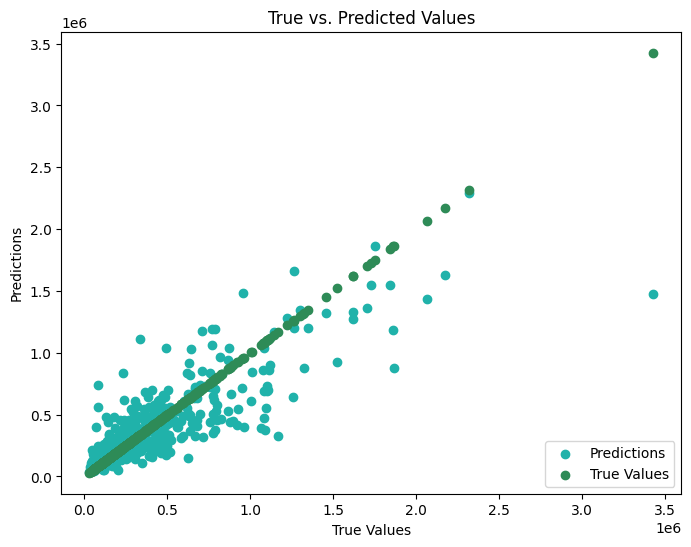

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='lightseagreen', label='Predictions')
plt.scatter(y_test, y_test, color='seagreen', label='True Values') 
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.legend(loc="lower right")
plt.show()

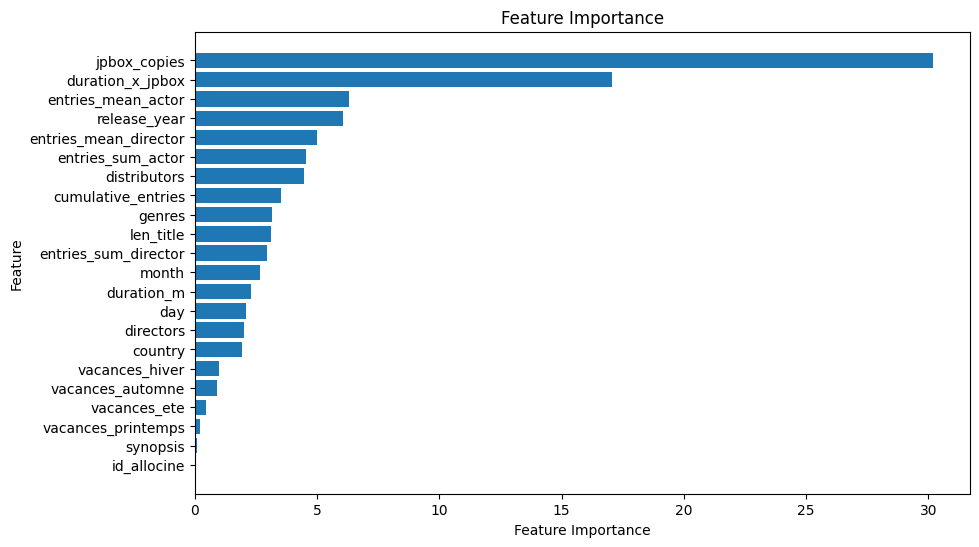

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Obtention des importances des caractéristiques
feature_importance = cat.feature_importances_

# Obtention des noms des caractéristiques
feature_names = X_train.columns

# Triez les importances des caractéristiques et les noms des caractéristiques
sorted_idx = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Sauvegarde du modèle (pickle)

In [34]:
import pickle
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(cat, file)

In [44]:
W = X_test.copy()
W['y_test'] = y_test
W['y_pred'] = y_pred
W["diff_pred_and_true_value"] = abs(100 - round(y_pred * 100 / y_test, 2))
W = W[["y_test", "y_pred", "diff_pred_and_true_value"]]
W.head(20)

,y_test,y_pred,diff_pred_and_true_value
428,697852.0,5.062353e+05,27.46
3597,142402.0,9.153525e+04,35.72
221,102195.0,1.970691e+05,92.84
736,101764.0,2.494143e+05,145.09
1245,92291.0,1.528959e+05,65.67
1649,324593.0,4.877943e+05,50.28
1744,1254628.0,6.436516e+05,48.70
3558,116929.0,9.568576e+04,18.17
1931,237700.0,2.750193e+05,15.70
977,132903.0,1.218263e+05,8.33


In [45]:
W["diff_pred_and_true_value"].mean()

43.63508223684211